# Задание
Выбранные данные: 4. hepatitis.csv
Набор данных содержит информацию о пациентах, страдающих от гепатита. Цель построения модели -предсказание, выживет ли пациент в течение некоторого срока после снятия показателей.

!wget https://www.dropbox.com/s/jz3js87g36mu478/hepatitis.csv

In [197]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import sklearn
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [198]:
data = pd.read_csv('hepatitis.csv')
data.sample(5)

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,AlbuMin,ProTime,Histology,Class
41,39,1,2,2,1,2,2,2,2,2,2,2,2,1.0,34,15,4.0,54,1,2
43,34,2,1,1,2,2,2,2,1,2,2,2,2,0.6,30,24,4.0,76,1,2
46,30,1,1,2,2,2,2,2,2,2,2,2,2,0.7,100,31,4.0,100,1,2
53,30,1,1,2,1,1,2,2,1,2,1,2,2,0.8,147,128,3.9,100,2,2
24,65,1,2,2,1,1,2,2,1,1,1,1,2,0.3,180,53,2.9,74,2,2


# 2. Исследование данных
Имеется 20 столбцов, среди них 19 признаков, столбец "Class" является выходной переменной.
Размер полного набора данных - 80 экземпляров.
Пропусков в данных нет. Дубликатов нет.

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             80 non-null     int64  
 1   Sex             80 non-null     int64  
 2   Steroid         80 non-null     int64  
 3   Antivirals      80 non-null     int64  
 4   Fatigue         80 non-null     int64  
 5   Malaise         80 non-null     int64  
 6   Anorexia        80 non-null     int64  
 7   LiverBig        80 non-null     int64  
 8   LiverFirm       80 non-null     int64  
 9   SpleenPalpable  80 non-null     int64  
 10  Spiders         80 non-null     int64  
 11  Ascites         80 non-null     int64  
 12  Varices         80 non-null     int64  
 13  Bilirubin       80 non-null     float64
 14  AlkPhosphate    80 non-null     int64  
 15  Sgot            80 non-null     int64  
 16  AlbuMin         80 non-null     float64
 17  ProTime         80 non-null     int64

In [200]:
data.duplicated().sum()

0

### Расчёт коэффициента дисбаланса

In [201]:
data['Class'].value_counts()

2    67
1    13
Name: Class, dtype: int64

In [202]:
negative_class, positive_class = data['Class'].value_counts()
print(f"Положительный класс: {positive_class}\nОтрицательный класс: {negative_class}\nКоэффициент дисбаланса: {negative_class/positive_class}")

Положительный класс: 13
Отрицательный класс: 67
Коэффициент дисбаланса: 5.153846153846154


In [203]:
data.describe()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,AlbuMin,ProTime,Histology,Class
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000
mean,40.66250,1.137500,1.525000,1.737500,1.350000,1.612500,1.850000,1.837500,1.525000,1.812500,1.687500,1.850000,1.875000,1.221250,102.912500,82.025000,3.843750,62.512500,1.41250,1.837500
std,11.28003,0.346547,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.875213,53.684779,71.599974,0.576292,23.427774,0.49539,0.371236
min,20.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.00000,1.000000
25%,32.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,68.250000,30.750000,3.500000,46.000000,1.00000,2.000000
50%,38.50000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,56.500000,4.000000,62.000000,1.00000,2.000000
75%,49.25000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.300000,133.500000,102.750000,4.200000,77.250000,2.00000,2.000000
max,72.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.800000,280.000000,420.000000,5.000000,100.000000,2.00000,2.000000


In [204]:
y = data['Class']
X = data.drop('Class', axis = 1)
X.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,AlbuMin,ProTime,Histology
0,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
1,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78,30,4.4,85,1
2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59,249,3.7,54,1
3,41,1,2,1,1,2,2,2,1,2,2,2,2,0.9,81,60,3.9,52,1
4,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1


### Нормализация

In [205]:
from sklearn.preprocessing import normalize
X_scaled = normalize(X, axis = 0, norm='max')
X = pd.DataFrame(X_scaled, columns = X.columns)
X.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,AlbuMin,ProTime,Histology
0,0.472222,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.187500,0.339286,0.066667,0.80,0.75,0.5
1,0.541667,0.5,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,0.270833,0.278571,0.071429,0.88,0.85,0.5
2,0.444444,0.5,1.0,0.5,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.208333,0.210714,0.592857,0.74,0.54,0.5
3,0.569444,0.5,1.0,0.5,0.5,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.187500,0.289286,0.142857,0.78,0.52,0.5
4,0.416667,0.5,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.458333,0.203571,0.342857,0.98,0.78,0.5


In [206]:
X.describe()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,AlbuMin,ProTime,Histology
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.564757,0.568750,0.762500,0.868750,0.675000,0.806250,0.925000,0.918750,0.762500,0.906250,0.843750,0.925000,0.937500,0.254427,0.367545,0.195298,0.768750,0.625125,0.706250
std,0.156667,0.173274,0.251263,0.221384,0.239989,0.245127,0.179662,0.185618,0.251263,0.196387,0.233218,0.179662,0.166403,0.182336,0.191731,0.170476,0.115258,0.234278,0.247695
min,0.277778,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.062500,0.092857,0.033333,0.420000,0.000000,0.500000
25%,0.444444,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.145833,0.243750,0.073214,0.700000,0.460000,0.500000
50%,0.534722,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.208333,0.303571,0.134524,0.800000,0.620000,0.500000
75%,0.684028,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.270833,0.476786,0.244643,0.840000,0.772500,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Разделение данных на выборки

In [207]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100, shuffle=True, stratify=y)
print('Обучение %s' % Counter(y_train))
print('Тестирование %s' % Counter(y_test))

Обучение Counter({2: 54, 1: 10})
Тестирование Counter({2: 13, 1: 3})


Взял зависимости: "Age" - "AlbuMin" и "Age" - "Bilirubin"

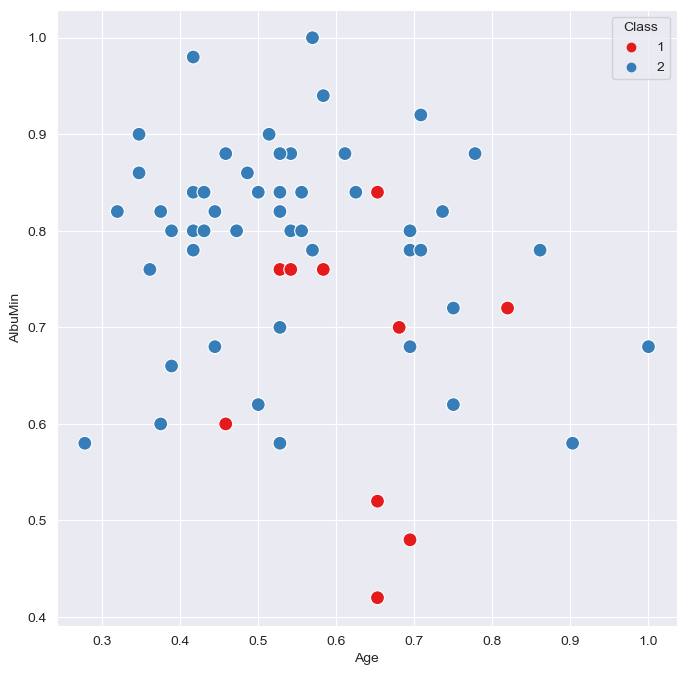

In [208]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=x_train, x="Age", y="AlbuMin", hue=y_train, palette='Set1', s=100);

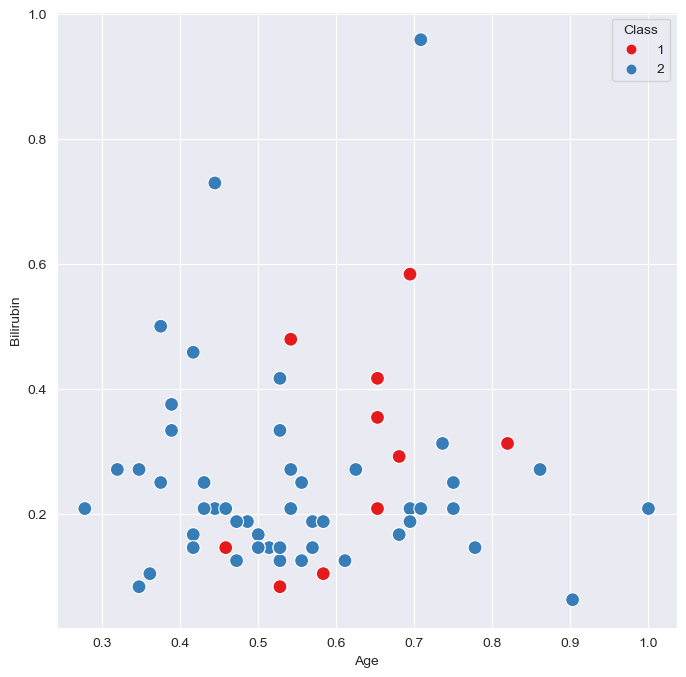

In [209]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=x_train, x="Age", y="Bilirubin", hue=y_train, palette='Set1', s=100);

# Построение моделей на оригинальных данных

Сначала обучу на логистической регрессии

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
logreg = LogisticRegression(random_state=100, solver="liblinear")
logreg.fit(x_train, y_train)
logreg_prediction_unbalance = logreg.predict(x_test)

Затем деревья. Для сравнения использую метрику recall

In [211]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=50, random_state=100)
model.fit(x_train, y_train)
dectree_prediction_unbalance = model.predict(x_test)

### Оценка качества классификаторов без устранения дисбланаса

Логистическая регрессия
Матрица ошибок без нормализации
[[ 1  2]
 [ 0 13]]
Нормализованная матрица ошибок
[[0.33333333 0.66666667]
 [0.         1.        ]]


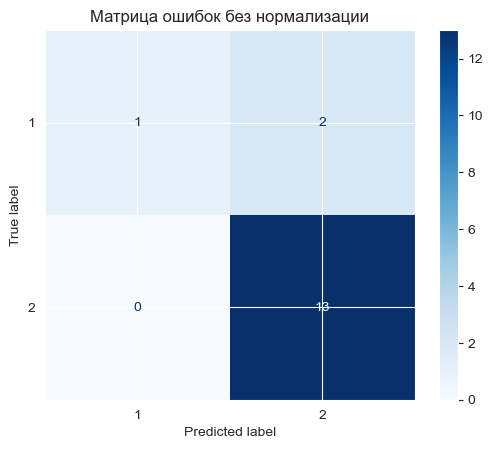

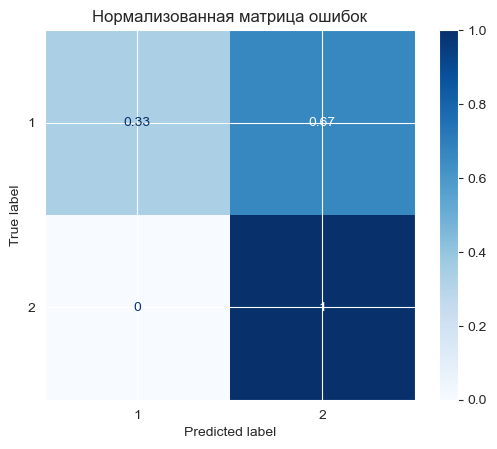

In [212]:
from sklearn.metrics import ConfusionMatrixDisplay
print('Логистическая регрессия')
titles_options = [
    ("Матрица ошибок без нормализации", None),
    ("Нормализованная матрица ошибок", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        logreg,
        x_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Дерево решений
Матрица ошибок без нормализации
[[ 2  1]
 [ 3 10]]
Нормализованная матрица ошибок
[[0.66666667 0.33333333]
 [0.23076923 0.76923077]]


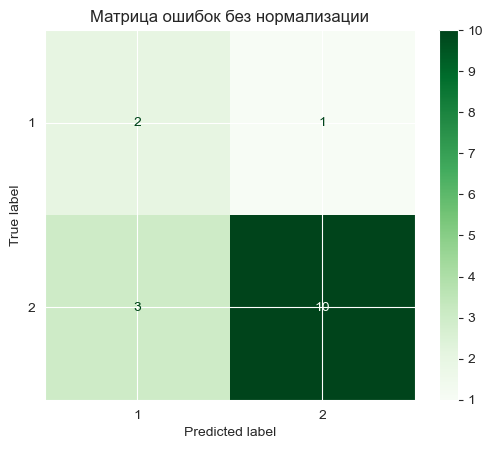

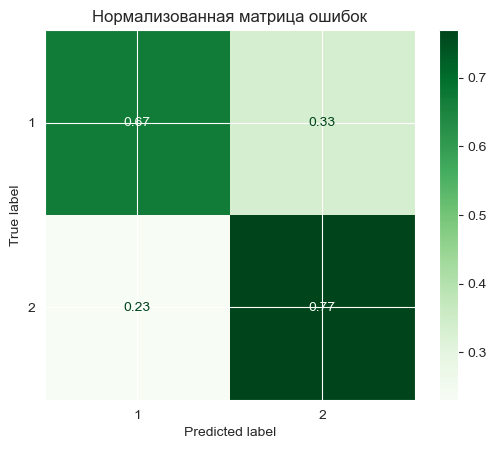

In [213]:
print('Дерево решений')
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        x_test,
        y_test,
        cmap=plt.cm.Greens,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Вывод: логистическая регрессия очень сильно ошибается на положительном классе из-за дисбаланса, в то время как отрицательный класс имеет процент предсказания 100 - значит модель переобучилась на отрицательном классе. Дерево решений немного лучше срабатывает на положительном классе, скорее всего, из-за того, что он меньше подвержен дисбалансу.

In [214]:
X_before_sampling = x_train.copy(deep=True)
y_before_sampling = y_train.copy(deep=True)

# Увеличение данных

In [215]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import KMeansSMOTE

### 1. RandomOverSampler

In [216]:
print('RandomOverSampler')
oversampling_algorithm = RandomOverSampler(random_state=50)
X_after_sampling, y_after_sampling = oversampling_algorithm.fit_resample(X_before_sampling, y_before_sampling.ravel())
print('Оригинальные данные %s' % Counter(y_before_sampling))
print('Отредактированные данные %s' % Counter(y_after_sampling))

RandomOverSampler
Оригинальные данные Counter({2: 54, 1: 10})
Отредактированные данные Counter({2: 54, 1: 54})


#### Обучение

In [217]:
logreg.fit(X_after_sampling, y_after_sampling)
model.fit(X_after_sampling, y_after_sampling)

DecisionTreeClassifier(max_depth=50, random_state=100)

Логистическая регрессия
Нормализованная матрица ошибок
[[1.         0.        ]
 [0.07692308 0.92307692]]


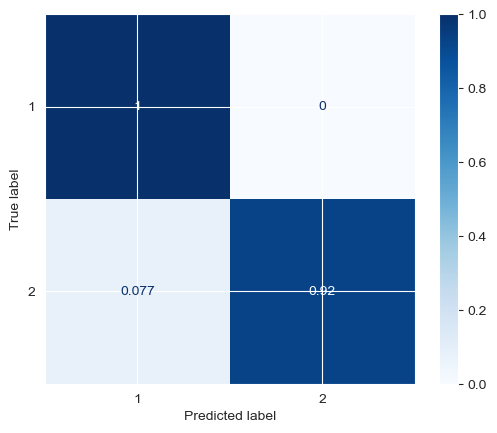

In [218]:
print('Логистическая регрессия')
disp = ConfusionMatrixDisplay.from_estimator(
    logreg,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=normalize)
print(title)
print(disp.confusion_matrix)

Дерево решений
Нормализованная матрица ошибок
[[0.66666667 0.33333333]
 [0.23076923 0.76923077]]


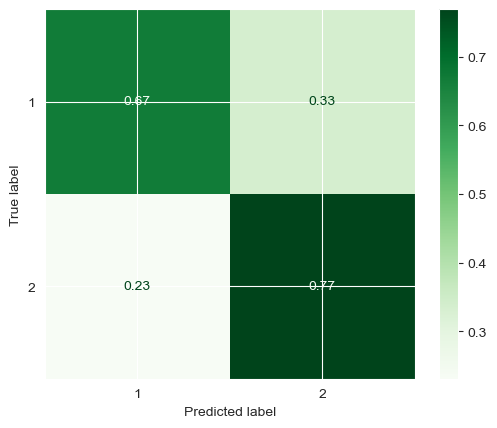

In [219]:
print('Дерево решений')
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    cmap=plt.cm.Greens,
    normalize=normalize)
print(title)
print(disp.confusion_matrix)

Вывод: устранение дисбаланса решило проблему с недообучением у логистической регрессии на положительном классе. Предсказания дерева решений осталось без изменений

Обучающие данные до и после применения ROS


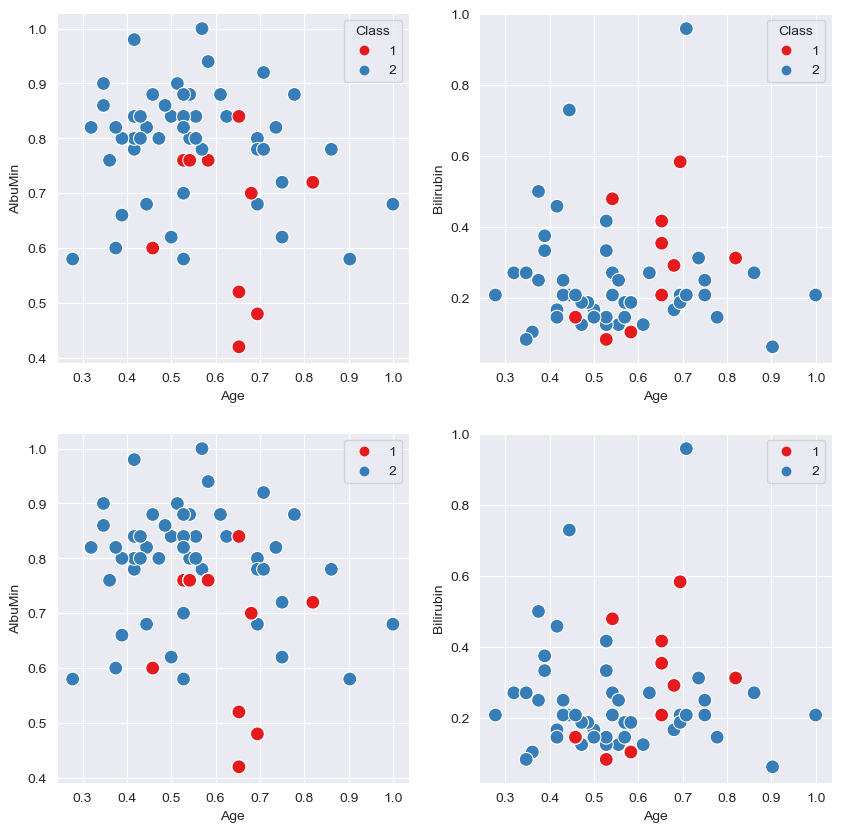

In [220]:
print('Обучающие данные до и после применения ROS')
figure = plt.figure(figsize=(10,10))

ax_1 = figure.add_subplot(2, 2, 1)
sns.scatterplot(data=X_before_sampling, x="Age", y="AlbuMin", hue=y_before_sampling, palette='Set1', s=100);
ax_2 = figure.add_subplot(2, 2, 2)
sns.scatterplot(data=X_before_sampling, x="Age", y="Bilirubin", hue=y_before_sampling, palette='Set1', s=100);
ax_3 = figure.add_subplot(2, 2, 3)
sns.scatterplot(data=X_after_sampling, x="Age", y="AlbuMin", hue=y_after_sampling, palette='Set1', s=100);
ax_4 = figure.add_subplot(2, 2, 4)
sns.scatterplot(data=X_after_sampling, x="Age", y="Bilirubin", hue=y_after_sampling, palette='Set1', s=100);

Разницы в графиках нет

### 2. SMOTE

SMOTE
Оригинальные данные Counter({2: 54, 1: 10})
Отредактированные данные Counter({2: 54, 1: 54})
Логистическая регрессия
Нормализованная матрица ошибок
[[1.         0.        ]
 [0.07692308 0.92307692]]


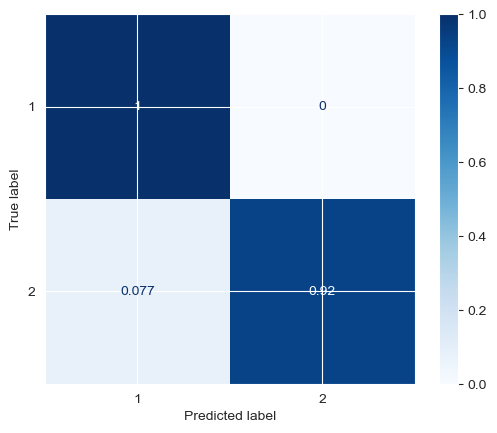

In [221]:
print('SMOTE')
oversampling_algorithm = SMOTE()
X_after_sampling, y_after_sampling = oversampling_algorithm.fit_resample(X_before_sampling, y_before_sampling.ravel())
print('Оригинальные данные %s' % Counter(y_before_sampling))
print('Отредактированные данные %s' % Counter(y_after_sampling))
logreg.fit(X_after_sampling, y_after_sampling)
model.fit(X_after_sampling, y_after_sampling)
print('Логистическая регрессия')
disp = ConfusionMatrixDisplay.from_estimator(
    logreg,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=normalize)
print(title)
print(disp.confusion_matrix)

По сравнению с ROS изменений нет

Дерево решений
Нормализованная матрица ошибок
[[1. 0.]
 [0. 1.]]


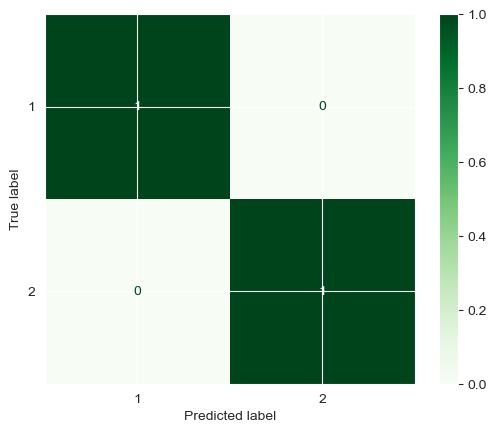

In [222]:
print('Дерево решений')
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    cmap=plt.cm.Greens,
    normalize=normalize)
print(title)
print(disp.confusion_matrix)

Вывод: после устранения дисбаланса логистическая модель показала такой же результат как и при ROS. Дерево решений улучшило показатели до 100% на обоих классах.

Обучающие данные до и после применения ROS


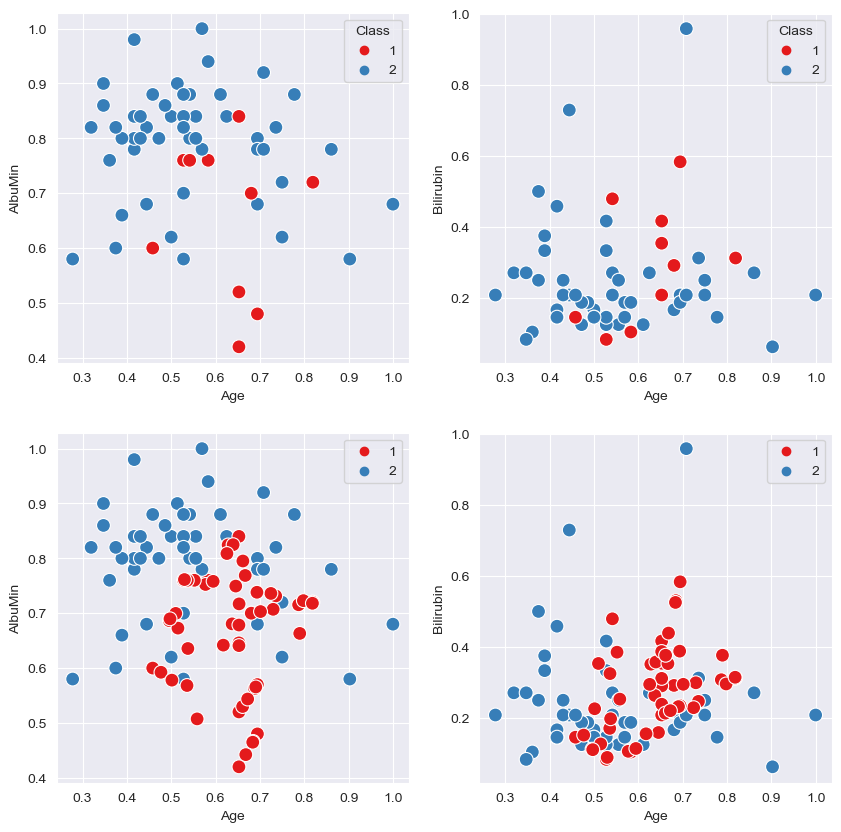

In [223]:
print('Обучающие данные до и после применения ROS')
figure = plt.figure(figsize=(10,10))

ax_1 = figure.add_subplot(2, 2, 1)
sns.scatterplot(data=X_before_sampling, x="Age", y="AlbuMin", hue=y_before_sampling, palette='Set1', s=100);
ax_2 = figure.add_subplot(2, 2, 2)
sns.scatterplot(data=X_before_sampling, x="Age", y="Bilirubin", hue=y_before_sampling, palette='Set1', s=100);
ax_3 = figure.add_subplot(2, 2, 3)
sns.scatterplot(data=X_after_sampling, x="Age", y="AlbuMin", hue=y_after_sampling, palette='Set1', s=100);
ax_4 = figure.add_subplot(2, 2, 4)
sns.scatterplot(data=X_after_sampling, x="Age", y="Bilirubin", hue=y_after_sampling, palette='Set1', s=100);

Изменения заметны по сравнению с ROS, присутствует немного избыточности на графике "Age" - "AlbuMin" на промежутке для оси Y = [0.4, 0.55]

### 3. ADASYN

ADASYN
Оригинальные данные Counter({2: 54, 1: 10})
Отредактированные данные Counter({1: 55, 2: 54})
Логистическая регрессия
Нормализованная матрица ошибок
[[1.         0.        ]
 [0.07692308 0.92307692]]


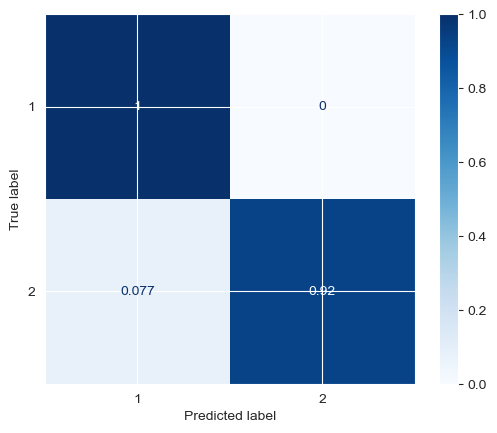

In [224]:
print('ADASYN')
oversampling_algorithm = ADASYN()
X_after_sampling, y_after_sampling = oversampling_algorithm.fit_resample(X_before_sampling, y_before_sampling.ravel())
print('Оригинальные данные %s' % Counter(y_before_sampling))
print('Отредактированные данные %s' % Counter(y_after_sampling))
logreg.fit(X_after_sampling, y_after_sampling)
model.fit(X_after_sampling, y_after_sampling)
print('Логистическая регрессия')
disp = ConfusionMatrixDisplay.from_estimator(
    logreg,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=normalize)
print(title)
print(disp.confusion_matrix)

Дерево решений
Нормализованная матрица ошибок
[[1. 0.]
 [0. 1.]]


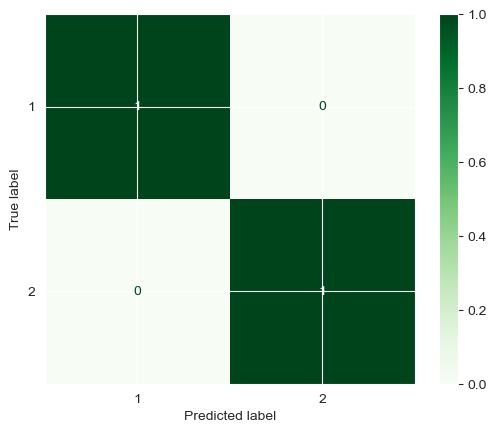

In [225]:
print('Дерево решений')
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    cmap=plt.cm.Greens,
    normalize=normalize)
print(title)
print(disp.confusion_matrix)

Вывод: ADASYN показал такой же результат как и SMOTE

Обучающие данные до и после применения ADASYN


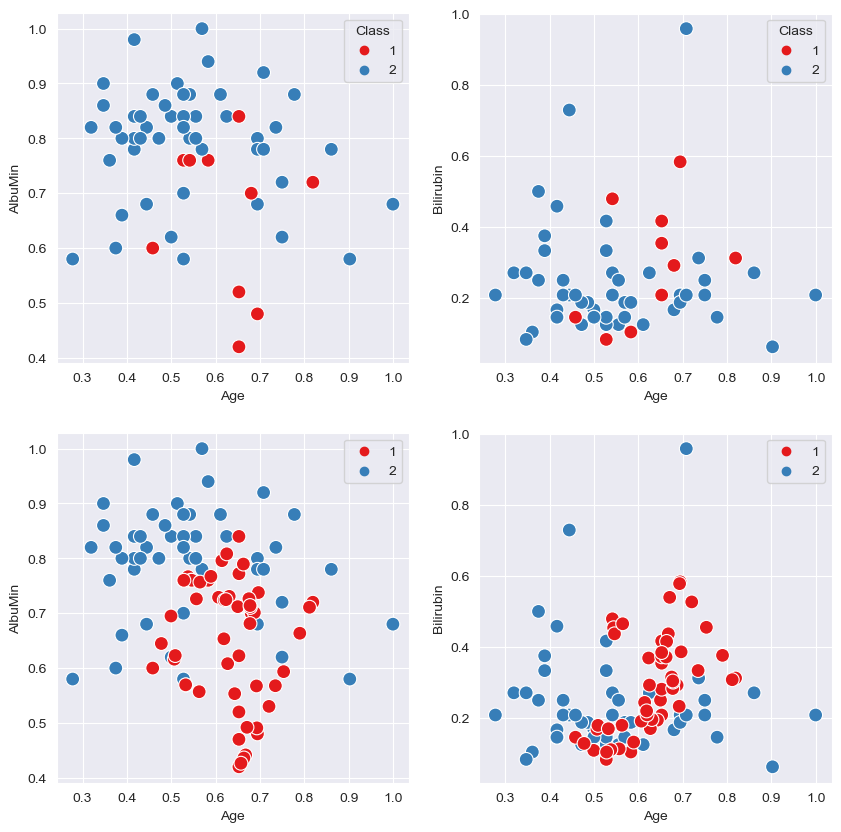

In [226]:
print('Обучающие данные до и после применения ADASYN')
figure = plt.figure(figsize=(10,10))

ax_1 = figure.add_subplot(2, 2, 1)
sns.scatterplot(data=X_before_sampling, x="Age", y="AlbuMin", hue=y_before_sampling, palette='Set1', s=100);
ax_2 = figure.add_subplot(2, 2, 2)
sns.scatterplot(data=X_before_sampling, x="Age", y="Bilirubin", hue=y_before_sampling, palette='Set1', s=100);
ax_3 = figure.add_subplot(2, 2, 3)
sns.scatterplot(data=X_after_sampling, x="Age", y="AlbuMin", hue=y_after_sampling, palette='Set1', s=100);
ax_4 = figure.add_subplot(2, 2, 4)
sns.scatterplot(data=X_after_sampling, x="Age", y="Bilirubin", hue=y_after_sampling, palette='Set1', s=100);

ADASYN создал больше избыточных данных на том же промежутке, что и SMOTE

### 4. KMeansSMOTE

KMeansSMOTE


C:\Users\alexander\anaconda3\envs\DataScience\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Оригинальные данные Counter({2: 54, 1: 10})
Отредактированные данные Counter({2: 54, 1: 54})
Логистическая регрессия
Нормализованная матрица ошибок
[[1. 0.]
 [0. 1.]]


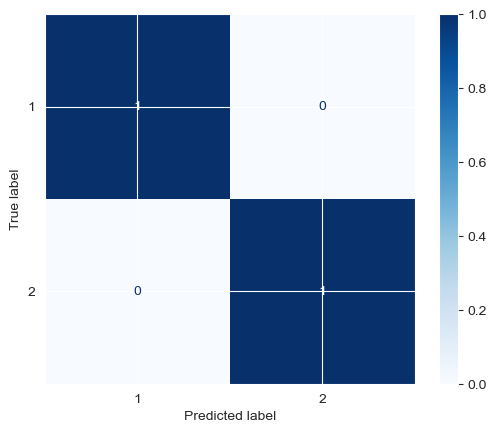

In [229]:
print('KMeansSMOTE')
oversampling_algorithm = KMeansSMOTE()
X_after_sampling, y_after_sampling = oversampling_algorithm.fit_resample(X_before_sampling, y_before_sampling.ravel())
print('Оригинальные данные %s' % Counter(y_before_sampling))
print('Отредактированные данные %s' % Counter(y_after_sampling))
logreg.fit(X_after_sampling, y_after_sampling)
model.fit(X_after_sampling, y_after_sampling)
print('Логистическая регрессия')
disp = ConfusionMatrixDisplay.from_estimator(
    logreg,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=normalize)
print(title)
print(disp.confusion_matrix)

Нормализованная матрица ошибок
[[0.66666667 0.33333333]
 [0.23076923 0.76923077]]


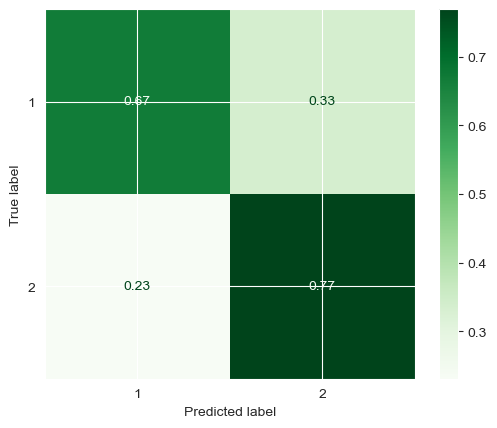

In [230]:
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    cmap=plt.cm.Greens,
    normalize=normalize)
print(title)
print(disp.confusion_matrix)

Вывод: логистическая регрессия после устранения дисбаланса методом KMeansSMOTE делает 100% предсказания, имеет место переобучение модели. Дерево решений ухудшило предсказания на положительном классе и вернулось к значениям предсказаний после использования ROS.

Обучающие данные до и после применения KMeansSMOTE


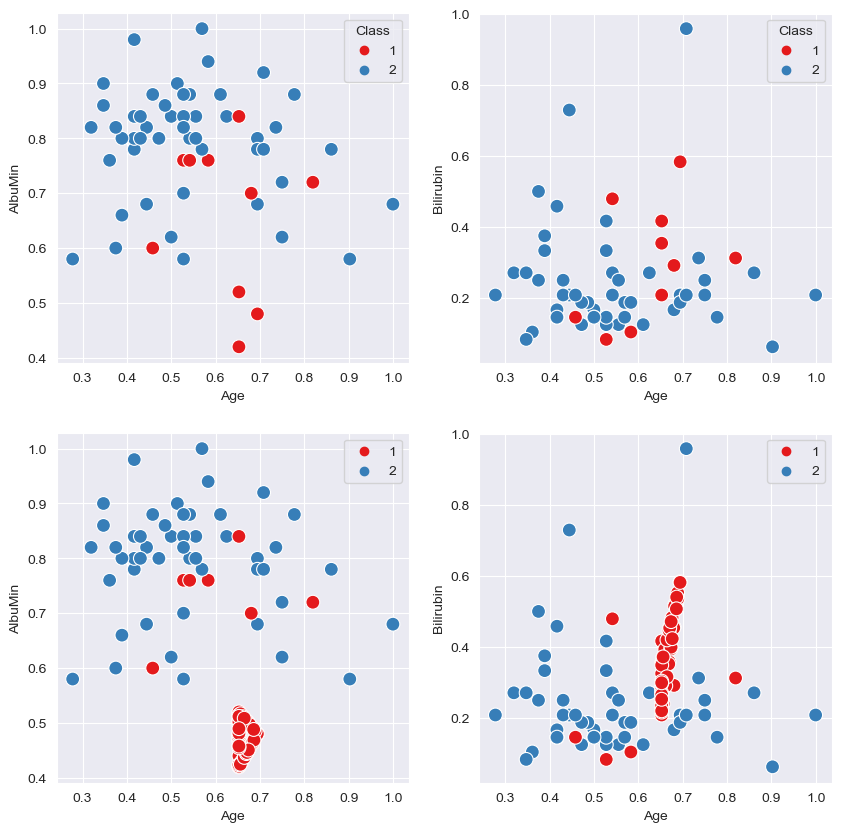

In [231]:
print('Обучающие данные до и после применения KMeansSMOTE')
figure = plt.figure(figsize=(10,10))

ax_1 = figure.add_subplot(2, 2, 1)
sns.scatterplot(data=X_before_sampling, x="Age", y="AlbuMin", hue=y_before_sampling, palette='Set1', s=100);
ax_2 = figure.add_subplot(2, 2, 2)
sns.scatterplot(data=X_before_sampling, x="Age", y="Bilirubin", hue=y_before_sampling, palette='Set1', s=100);
ax_3 = figure.add_subplot(2, 2, 3)
sns.scatterplot(data=X_after_sampling, x="Age", y="AlbuMin", hue=y_after_sampling, palette='Set1', s=100);
ax_4 = figure.add_subplot(2, 2, 4)
sns.scatterplot(data=X_after_sampling, x="Age", y="Bilirubin", hue=y_after_sampling, palette='Set1', s=100);

На графиках видно огромную избыточность (в частности для зависимости "Age" - "AlbuMin"), что скорее всего и привело к такому результату для логистической регрессии. Так как у дерева решений такие же показатели, как и у ROS, следовательно он менее склонен к чувствительности на избыточных данных

#### Наиболее полезные алгоритмы: SMOTE и ADASYN.

# Сокращение данных

In [232]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids

### 1.RandomUnderSampler

RandomUnderSampler
Оригинальные данные Counter({2: 54, 1: 10})
Отредактированные данные Counter({1: 10, 2: 10})
Нормализованная таблица ошибок для логистической регрессии
[[1.         0.        ]
 [0.07692308 0.92307692]]
Нормализованная таблица ошибок для решающего дерева
[[1.         0.        ]
 [0.23076923 0.76923077]]


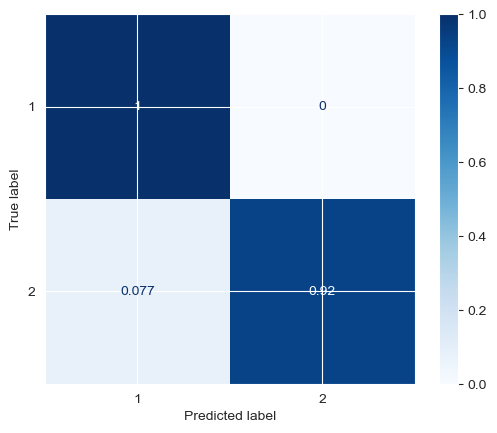

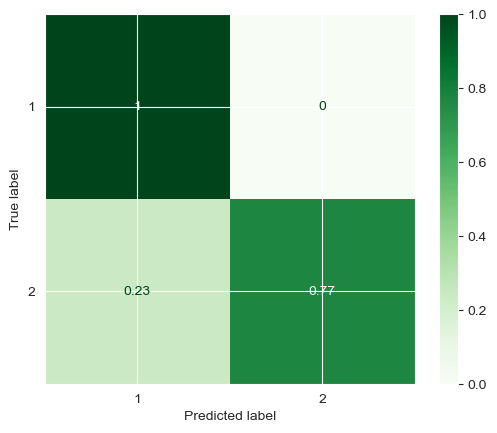

In [233]:
print('RandomUnderSampler')
undersampling_algorithm = RandomUnderSampler()
X_after_sampling, y_after_sampling = undersampling_algorithm.fit_resample(X_before_sampling, y_before_sampling.ravel())
print('Оригинальные данные %s' % Counter(y_before_sampling))
print('Отредактированные данные %s' % Counter(y_after_sampling))
logreg.fit(X_after_sampling, y_after_sampling)
model.fit(X_after_sampling, y_after_sampling)
disp = ConfusionMatrixDisplay.from_estimator(
        logreg,
        x_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize)
print('Нормализованная таблица ошибок для логистической регрессии')
print(disp.confusion_matrix)
disp = ConfusionMatrixDisplay.from_estimator(
        model,
        x_test,
        y_test,
        cmap=plt.cm.Greens,
        normalize=normalize)
print('Нормализованная таблица ошибок для решающего дерева')
print(disp.confusion_matrix)

Вывод: Ухудшилось предсказание на отрицательном классе для логистической регрессии, качество предсказаний для положительного класса осталось без изменений (по сравнению с SMOTE). Дерево решений выдало такой же результат как и в случае с SMOTE.

Обучающие данные до и после применения RUS


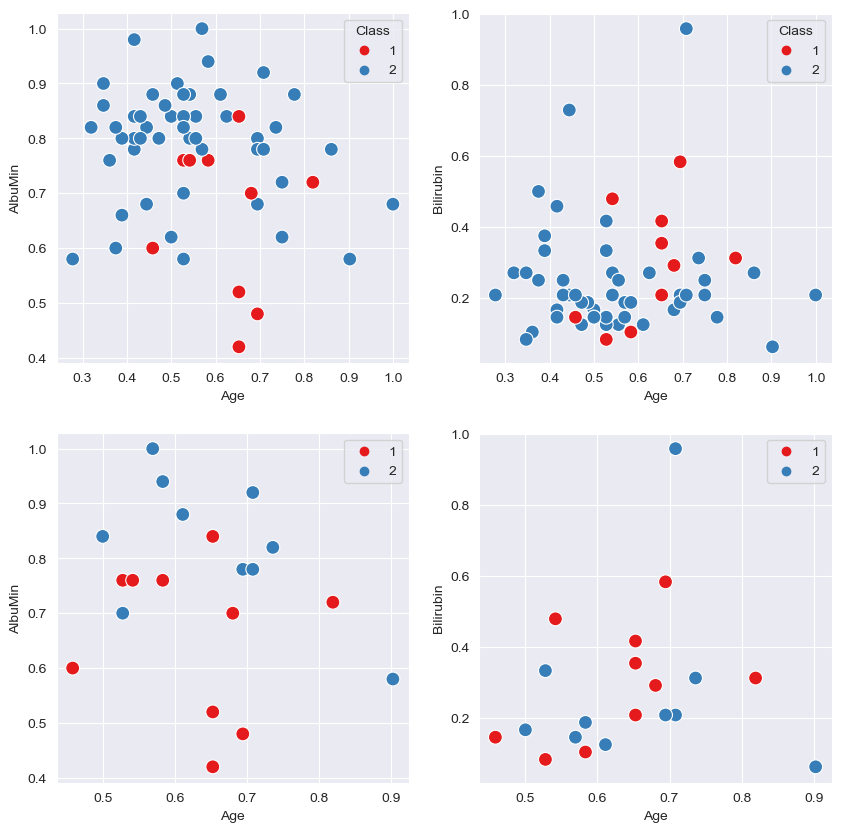

In [234]:
print('Обучающие данные до и после применения RUS')
figure = plt.figure(figsize=(10,10))

ax_1 = figure.add_subplot(2, 2, 1)
sns.scatterplot(data=X_before_sampling, x="Age", y="AlbuMin", hue=y_before_sampling, palette='Set1', s=100);
ax_2 = figure.add_subplot(2, 2, 2)
sns.scatterplot(data=X_before_sampling, x="Age", y="Bilirubin", hue=y_before_sampling, palette='Set1', s=100);
ax_3 = figure.add_subplot(2, 2, 3)
sns.scatterplot(data=X_after_sampling, x="Age", y="AlbuMin", hue=y_after_sampling, palette='Set1', s=100);
ax_4 = figure.add_subplot(2, 2, 4)
sns.scatterplot(data=X_after_sampling, x="Age", y="Bilirubin", hue=y_after_sampling, palette='Set1', s=100);

RUS убрал много "пограничных" случаев в данных, что и позволило увеличить точность предсказаний.

### 2. CondensedNearestNeighbour

CondensedNearestNeighbour
Оригинальные данные Counter({2: 54, 1: 10})
Отредактированные данные Counter({2: 17, 1: 10})
Нормализованная таблица ошибок для логистической регрессии
[[0.66666667 0.33333333]
 [0.         1.        ]]
Нормализованная таблица ошибок для решающего дерева
[[1.         0.        ]
 [0.61538462 0.38461538]]


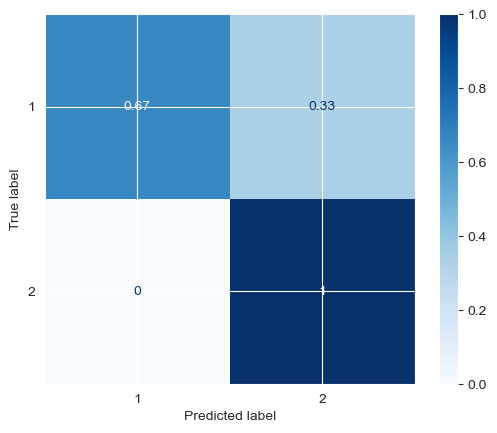

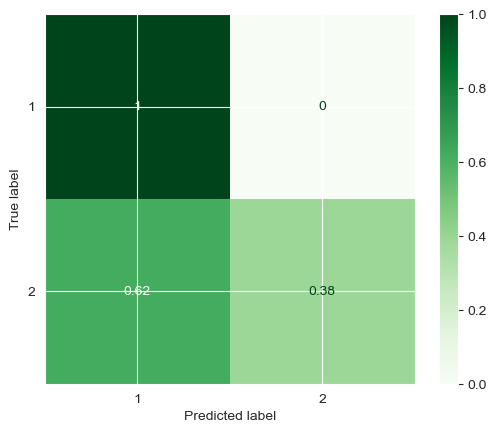

In [235]:
print('CondensedNearestNeighbour')
undersampling_algorithm = CondensedNearestNeighbour()
X_after_sampling, y_after_sampling = undersampling_algorithm.fit_resample(X_before_sampling, y_before_sampling.ravel())
print('Оригинальные данные %s' % Counter(y_before_sampling))
print('Отредактированные данные %s' % Counter(y_after_sampling))
logreg.fit(X_after_sampling, y_after_sampling)
model.fit(X_after_sampling, y_after_sampling)
disp = ConfusionMatrixDisplay.from_estimator(
    logreg,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=normalize)
print('Нормализованная таблица ошибок для логистической регрессии')
print(disp.confusion_matrix)
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    cmap=plt.cm.Greens,
    normalize=normalize)
print('Нормализованная таблица ошибок для решающего дерева')
print(disp.confusion_matrix)

Вывод: ухудшились показатели логистической регрессии на положительном классе, но улучшились на отрицательном. С деревом решений ровно наоборот - оно показало худший результат на предсказаниях для отрицательного класса среди всех алгоритмов.

Обучающие данные до и после применения CNN


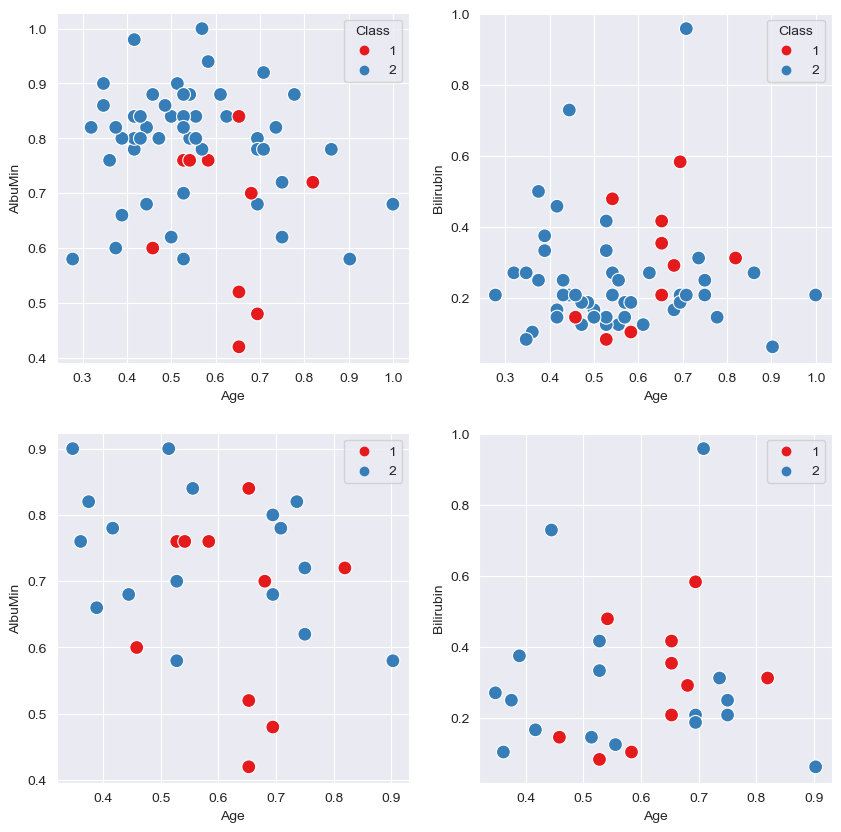

In [236]:
print('Обучающие данные до и после применения CNN')
figure = plt.figure(figsize=(10,10))

ax_1 = figure.add_subplot(2, 2, 1)
sns.scatterplot(data=X_before_sampling, x="Age", y="AlbuMin", hue=y_before_sampling, palette='Set1', s=100);
ax_2 = figure.add_subplot(2, 2, 2)
sns.scatterplot(data=X_before_sampling, x="Age", y="Bilirubin", hue=y_before_sampling, palette='Set1', s=100);
ax_3 = figure.add_subplot(2, 2, 3)
sns.scatterplot(data=X_after_sampling, x="Age", y="AlbuMin", hue=y_after_sampling, palette='Set1', s=100);
ax_4 = figure.add_subplot(2, 2, 4)
sns.scatterplot(data=X_after_sampling, x="Age", y="Bilirubin", hue=y_after_sampling, palette='Set1', s=100);

Здесь уже больше случаев, когда противоположные классы находятся рядом друг с другом.

CondensedNearestNeighbour
Оригинальные данные Counter({2: 54, 1: 10})
Отредактированные данные Counter({2: 16, 1: 10})
Нормализованная таблица ошибок для логистической регрессии
[[0.66666667 0.33333333]
 [0.         1.        ]]
Нормализованная таблица ошибок для решающего дерева
[[0.66666667 0.33333333]
 [0.23076923 0.76923077]]


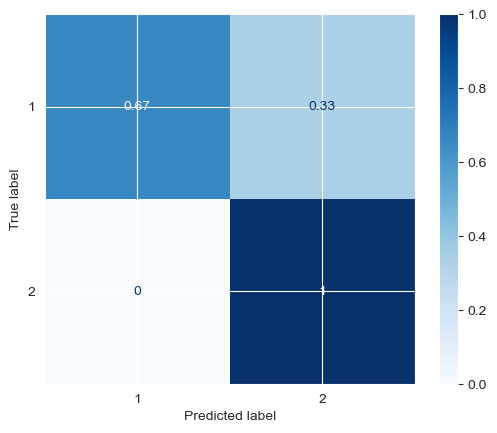

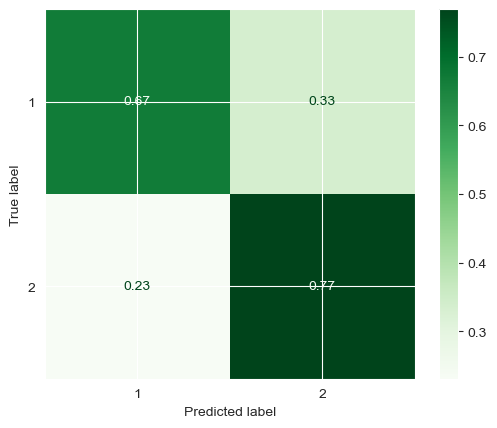

In [237]:
print('CondensedNearestNeighbour')
undersampling_algorithm = CondensedNearestNeighbour(n_neighbors=11)
X_after_sampling, y_after_sampling = undersampling_algorithm.fit_resample(X_before_sampling, y_before_sampling.ravel())
print('Оригинальные данные %s' % Counter(y_before_sampling))
print('Отредактированные данные %s' % Counter(y_after_sampling))
logreg.fit(X_after_sampling, y_after_sampling)
model.fit(X_after_sampling, y_after_sampling)
disp = ConfusionMatrixDisplay.from_estimator(
    logreg,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=normalize)
print('Нормализованная таблица ошибок для логистической регрессии')
print(disp.confusion_matrix)
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    cmap=plt.cm.Greens,
    normalize=normalize)
print('Нормализованная таблица ошибок для решающего дерева')
print(disp.confusion_matrix)

После установки n_neighbors = 11, модель показала такие же результаты для дерева решений как и ROS.

### 3. TomekLinks

TomekLinks
Оригинальные данные Counter({2: 54, 1: 10})
Отредактированные данные Counter({2: 52, 1: 8})
Нормализованная таблица ошибок для логистической регрессии
[[0. 1.]
 [0. 1.]]
Нормализованная таблица ошибок для решающего дерева
[[0.66666667 0.33333333]
 [0.23076923 0.76923077]]


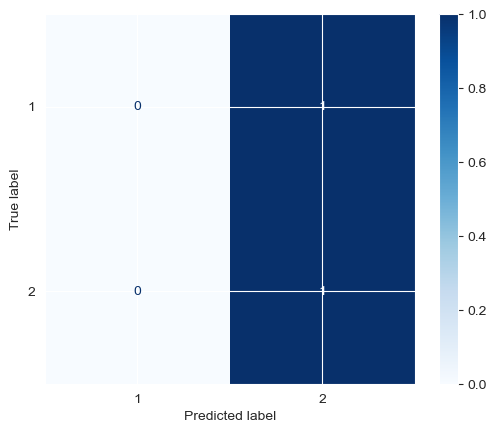

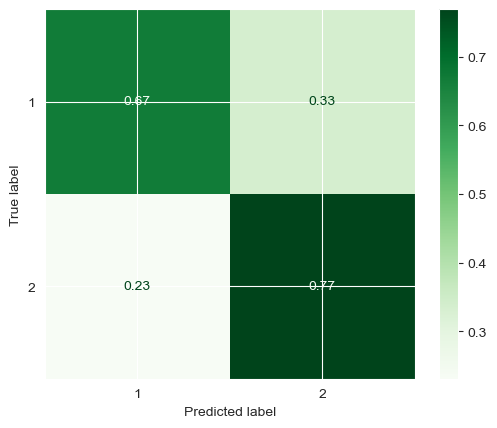

In [238]:
print('TomekLinks')
undersampling_algorithm = TomekLinks(sampling_strategy="all")
print('Оригинальные данные %s' % Counter(y_before_sampling))
X_after_sampling, y_after_sampling = undersampling_algorithm.fit_resample(X_before_sampling, y_before_sampling.ravel())
print('Отредактированные данные %s' % Counter(y_after_sampling))
logreg.fit(X_after_sampling, y_after_sampling)
model.fit(X_after_sampling, y_after_sampling)
disp = ConfusionMatrixDisplay.from_estimator(
    logreg,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=normalize)
print('Нормализованная таблица ошибок для логистической регрессии')
print(disp.confusion_matrix)
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    cmap=plt.cm.Greens,
    normalize=normalize)
print('Нормализованная таблица ошибок для решающего дерева')
print(disp.confusion_matrix)

Для логистической регрессии это худший результат из всех - на лицо явное переобучение на отрицательном классе. Показатели для дерева решений такие же, как и с без устранения дисбаланса.

### 4. ClusterCentroids

ClusterCentroids


C:\Users\alexander\anaconda3\envs\DataScience\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Оригинальные данные Counter({2: 54, 1: 10})
Отредактированные данные Counter({1: 10, 2: 10})
Нормализованная таблица ошибок для логистической регрессии
[[1.         0.        ]
 [0.07692308 0.92307692]]
Нормализованная таблица ошибок для решающего дерева
[[1.         0.        ]
 [0.15384615 0.84615385]]


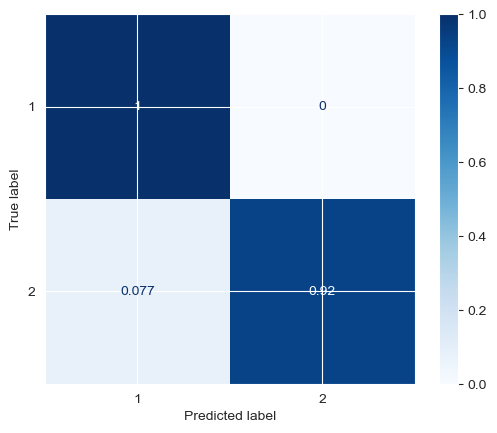

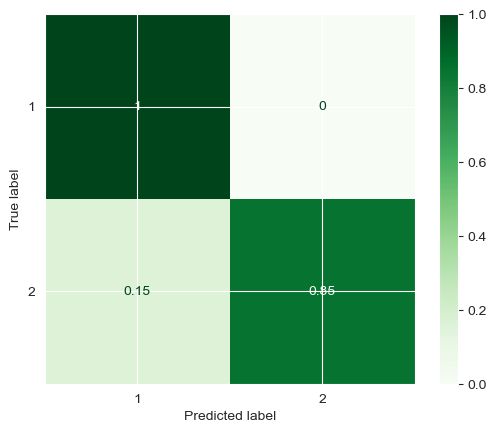

In [239]:
print('ClusterCentroids')
from sklearn.cluster import MiniBatchKMeans
undersampling_algorithm = ClusterCentroids(estimator=MiniBatchKMeans(n_clusters = 5, n_init=1, random_state=0), random_state=42)
X_after_sampling, y_after_sampling = undersampling_algorithm.fit_resample(X_before_sampling, y_before_sampling.ravel())
print('Оригинальные данные %s' % Counter(y_before_sampling))
print('Отредактированные данные %s' % Counter(y_after_sampling))
logreg.fit(X_after_sampling, y_after_sampling)
model.fit(X_after_sampling, y_after_sampling)
disp = ConfusionMatrixDisplay.from_estimator(
    logreg,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=normalize)
print('Нормализованная таблица ошибок для логистической регрессии')
print(disp.confusion_matrix)
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    cmap=plt.cm.Greens,
    normalize=normalize)
print('Нормализованная таблица ошибок для решающего дерева')
print(disp.confusion_matrix)

Вывод: пока что, это лучший результат из всех алгоритмов сразу для 2-ух моделей одновременно (если предположить, что модель просто переобучилась в случае с SMOTE и ADASYN)

Обучающие данные до и после применения ClusterCentroids


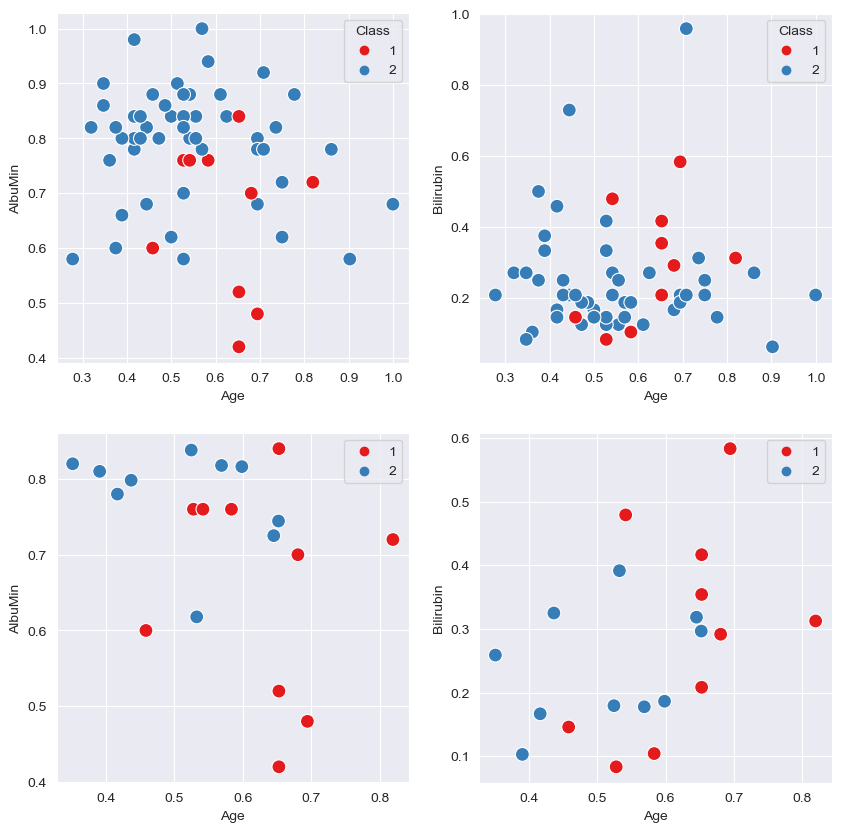

In [240]:
print('Обучающие данные до и после применения ClusterCentroids')
figure = plt.figure(figsize=(10,10))

ax_1 = figure.add_subplot(2, 2, 1)
sns.scatterplot(data=X_before_sampling, x="Age", y="AlbuMin", hue=y_before_sampling, palette='Set1', s=100);
ax_2 = figure.add_subplot(2, 2, 2)
sns.scatterplot(data=X_before_sampling, x="Age", y="Bilirubin", hue=y_before_sampling, palette='Set1', s=100);
ax_3 = figure.add_subplot(2, 2, 3)
sns.scatterplot(data=X_after_sampling, x="Age", y="AlbuMin", hue=y_after_sampling, palette='Set1', s=100);
ax_4 = figure.add_subplot(2, 2, 4)
sns.scatterplot(data=X_after_sampling, x="Age", y="Bilirubin", hue=y_after_sampling, palette='Set1', s=100);

# Удаление и добавление одновременно

In [241]:
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

### 1. SMOTEENN

SMOTEENN-minority
Оригинальные данные Counter({2: 54, 1: 10})
Отредактированные данные Counter({1: 51, 2: 34})
Нормализованная таблица ошибок для логистической регрессии
[[1.         0.        ]
 [0.15384615 0.84615385]]
Нормализованная таблица ошибок для решающего дерева
[[1. 0.]
 [0. 1.]]


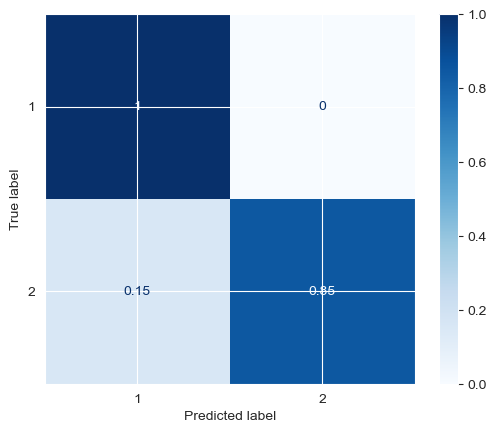

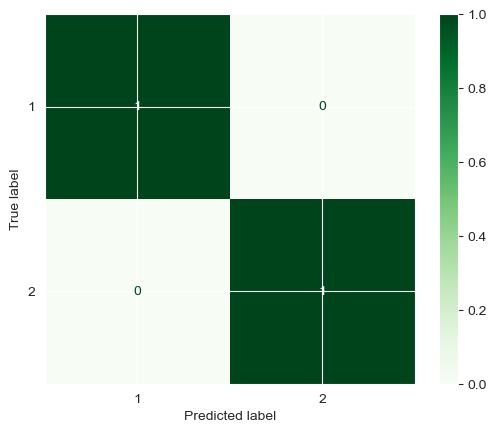

In [242]:
print('SMOTEENN-minority')
combine_algorithm = SMOTEENN(sampling_strategy = 'minority', random_state=42)
X_after_sampling, y_after_sampling = combine_algorithm.fit_resample(X_before_sampling, y_before_sampling.ravel())
print('Оригинальные данные %s' % Counter(y_before_sampling))
print('Отредактированные данные %s' % Counter(y_after_sampling))
logreg.fit(X_after_sampling, y_after_sampling)
model.fit(X_after_sampling, y_after_sampling)
disp = ConfusionMatrixDisplay.from_estimator(
    logreg,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=normalize)
print('Нормализованная таблица ошибок для логистической регрессии')
print(disp.confusion_matrix)
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    cmap=plt.cm.Greens,
    normalize=normalize)
print('Нормализованная таблица ошибок для решающего дерева')
print(disp.confusion_matrix)

Вывод: данных в этом датасете мало, поэтому сложно понять переобучение ли это или нет. В любом случае, смотря на сухие цифры, дерево решений справляется замечательно, как и логистическая регрессия.

Обучающие данные до и после применения SMOTEENN-minority


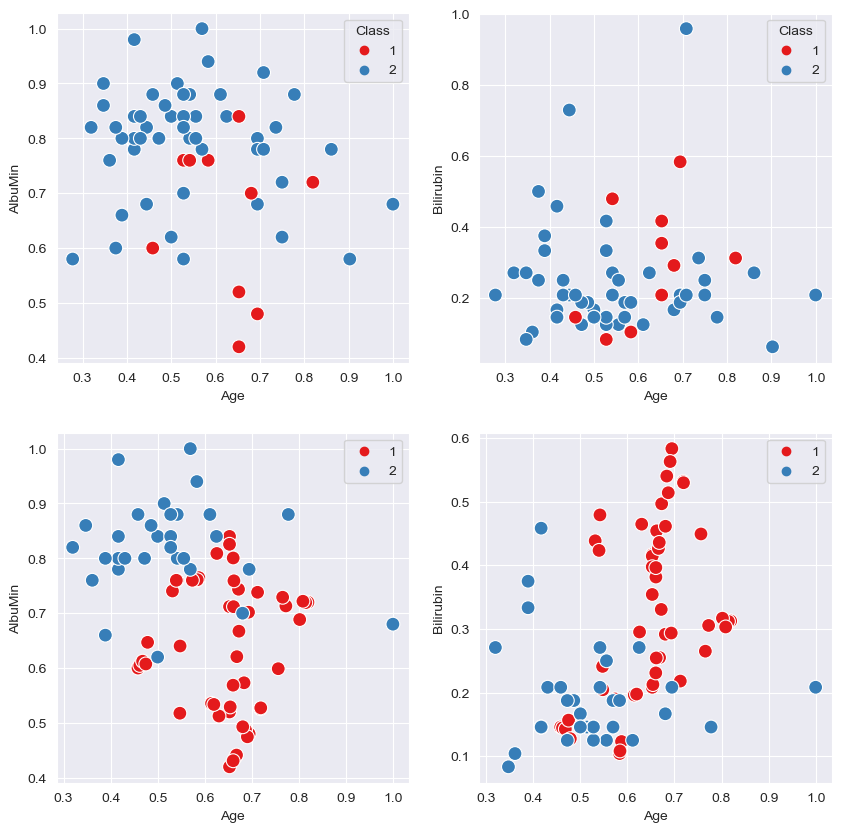

In [243]:
print('Обучающие данные до и после применения SMOTEENN-minority')
figure = plt.figure(figsize=(10,10))

ax_1 = figure.add_subplot(2, 2, 1)
sns.scatterplot(data=X_before_sampling, x="Age", y="AlbuMin", hue=y_before_sampling, palette='Set1', s=100);
ax_2 = figure.add_subplot(2, 2, 2)
sns.scatterplot(data=X_before_sampling, x="Age", y="Bilirubin", hue=y_before_sampling, palette='Set1', s=100);
ax_3 = figure.add_subplot(2, 2, 3)
sns.scatterplot(data=X_after_sampling, x="Age", y="AlbuMin", hue=y_after_sampling, palette='Set1', s=100);
ax_4 = figure.add_subplot(2, 2, 4)
sns.scatterplot(data=X_after_sampling, x="Age", y="Bilirubin", hue=y_after_sampling, palette='Set1', s=100);

### 2. SMOTEENN-not minority

SMOTEENN-not minority
Оригинальные данные Counter({2: 54, 1: 10})
Отредактированные данные Counter({1: 54, 2: 33})
Нормализованная таблица ошибок для логистической регрессии
[[1.         0.        ]
 [0.15384615 0.84615385]]
Нормализованная таблица ошибок для решающего дерева
[[1.         0.        ]
 [0.15384615 0.84615385]]


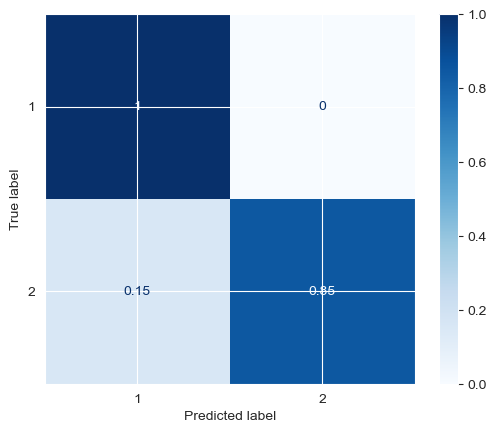

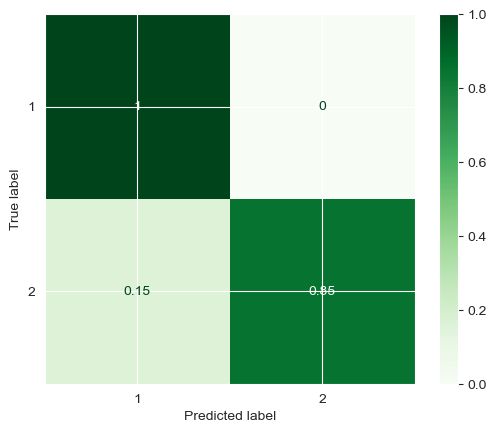

In [244]:
print('SMOTEENN-not minority')

combine_algorithm = SMOTEENN(sampling_strategy = 'all', random_state=40)
X_after_sampling, y_after_sampling = combine_algorithm.fit_resample(X_before_sampling, y_before_sampling.ravel())
print('Оригинальные данные %s' % Counter(y_before_sampling))
print('Отредактированные данные %s' % Counter(y_after_sampling))
logreg.fit(X_after_sampling, y_after_sampling)
model.fit(X_after_sampling, y_after_sampling)
disp = ConfusionMatrixDisplay.from_estimator(
    logreg,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=normalize)
print('Нормализованная таблица ошибок для логистической регрессии')
print(disp.confusion_matrix)
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    cmap=plt.cm.Greens,
    normalize=normalize)
print('Нормализованная таблица ошибок для решающего дерева')
print(disp.confusion_matrix)

Вывод: параметр "not minority" для моих данных не подходит (выдаёт ошибку). Перебрав все варианты данного параметра, они все показывали один и тот же результат, поэтому я остановился на "minority". Скорее всего это из-за того, что у меня слишком мало данных класса "1".

### 3. SMOTETomek

SMOTETomek
Оригинальные данные Counter({2: 54, 1: 10})
Отредактированные данные Counter({2: 54, 1: 54})
Нормализованная таблица ошибок для логистической регрессии
[[1.         0.        ]
 [0.07692308 0.92307692]]
Нормализованная таблица ошибок для решающего дерева
[[1.         0.        ]
 [0.07692308 0.92307692]]


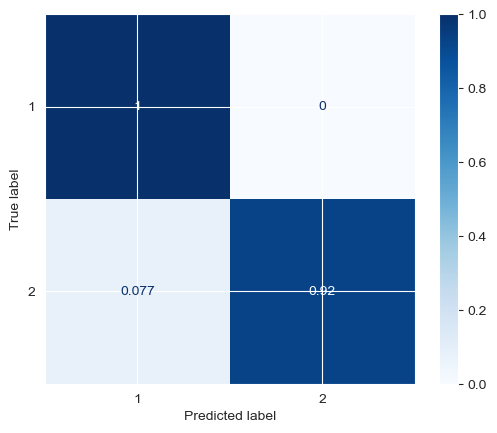

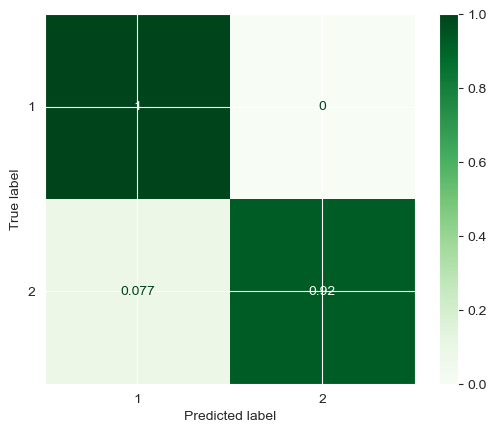

In [245]:
print('SMOTETomek')
combine_algorithm = SMOTETomek(sampling_strategy = 'all', random_state=42)
X_after_sampling, y_after_sampling = combine_algorithm.fit_resample(X_before_sampling, y_before_sampling.ravel())
print('Оригинальные данные %s' % Counter(y_before_sampling))
print('Отредактированные данные %s' % Counter(y_after_sampling))
logreg.fit(X_after_sampling, y_after_sampling)
model.fit(X_after_sampling, y_after_sampling)
disp = ConfusionMatrixDisplay.from_estimator(
    logreg,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=normalize)
print('Нормализованная таблица ошибок для логистической регрессии')
print(disp.confusion_matrix)
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    cmap=plt.cm.Greens,
    normalize=normalize)
print('Нормализованная таблица ошибок для решающего дерева')
print(disp.confusion_matrix)

Вывод: логистическая регрессия и дерево решений показывают одинаково хороший результат.

# Вывод общий

Лучше всего себя показал алгоритм SMOTEENN с параметром minority, а также ADASYN и SMOTE.